In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
non_train_metrics_pt = pd.read_csv("./../../../data/model_learning/comparison/scores/baselines/non_train_scores_kfold.csv")
non_train_metrics_pt = non_train_metrics_pt.replace({"resnext": "Baseline"})

non_train_metrics_ft_aug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_aug/non_train_scores_kfold.csv")

non_train_metrics_ft_noaug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_noaug/non_train_scores_kfold.csv")

non_train_metrics_pt_replica = pd.read_csv("./../../../data/model_learning/comparison/scores/baselines_replica/non_train_scores_kfold.csv")
# non_train_metrics_clus_replica = pd.read_csv("./../../../data/model_learning/comparison/scores/baselines_replica/non_train_scores_kfold.csv")

non_train_metrics_mini_replica_ft_aug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_minireplica_aug/non_train_scores_kfold.csv")
non_train_metrics_clus_replica_ft_aug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_clusreplica_aug/non_train_scores_kfold.csv")

non_train_metrics_mini_replica_ft_noaug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_minireplica_noaug/non_train_scores_kfold.csv")
non_train_metrics_clus_replica_ft_noaug = pd.read_csv("./../../../data/model_learning/comparison/scores/fine_tune_clusreplica_noaug/non_train_scores_kfold.csv")

In [3]:
val_ft_baseline = pd.concat([non_train_metrics_pt, non_train_metrics_ft_noaug, non_train_metrics_ft_aug])

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(val_ft_baseline, palette=palette, row="model", hue="model", aspect=9, height=2)
g.map_dataframe(sns.kdeplot, x="MP", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="MP", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    ax.set(ylabel=None)
    
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    
    vals = val_ft_baseline[val_ft_baseline["model"]==label].MP.values
    middle = vals.mean()
    sdev = vals.std()
    left = middle - sdev
    right = middle + sdev
    
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='black', ls=':')
    ax.fill_between(xs, 0, ys, facecolor='black', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='black', alpha=0.2)
    

g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Mean Position")
g.despine(left=True)
plt.suptitle('Distribution of Mean Position in Baseline and related variants', y=0.98)

Text(0, 998.5090474995383, '1004.3')

Text(1, 343.1288174421679, '348.92')

Text(2, 377.80339023164504, '383.59')

Text(0.5, 1.0, 'Distribution of Mean Position')

[]

Text(0, 0.5, 'Mean Position')

Text(0.5, 0, 'Model')

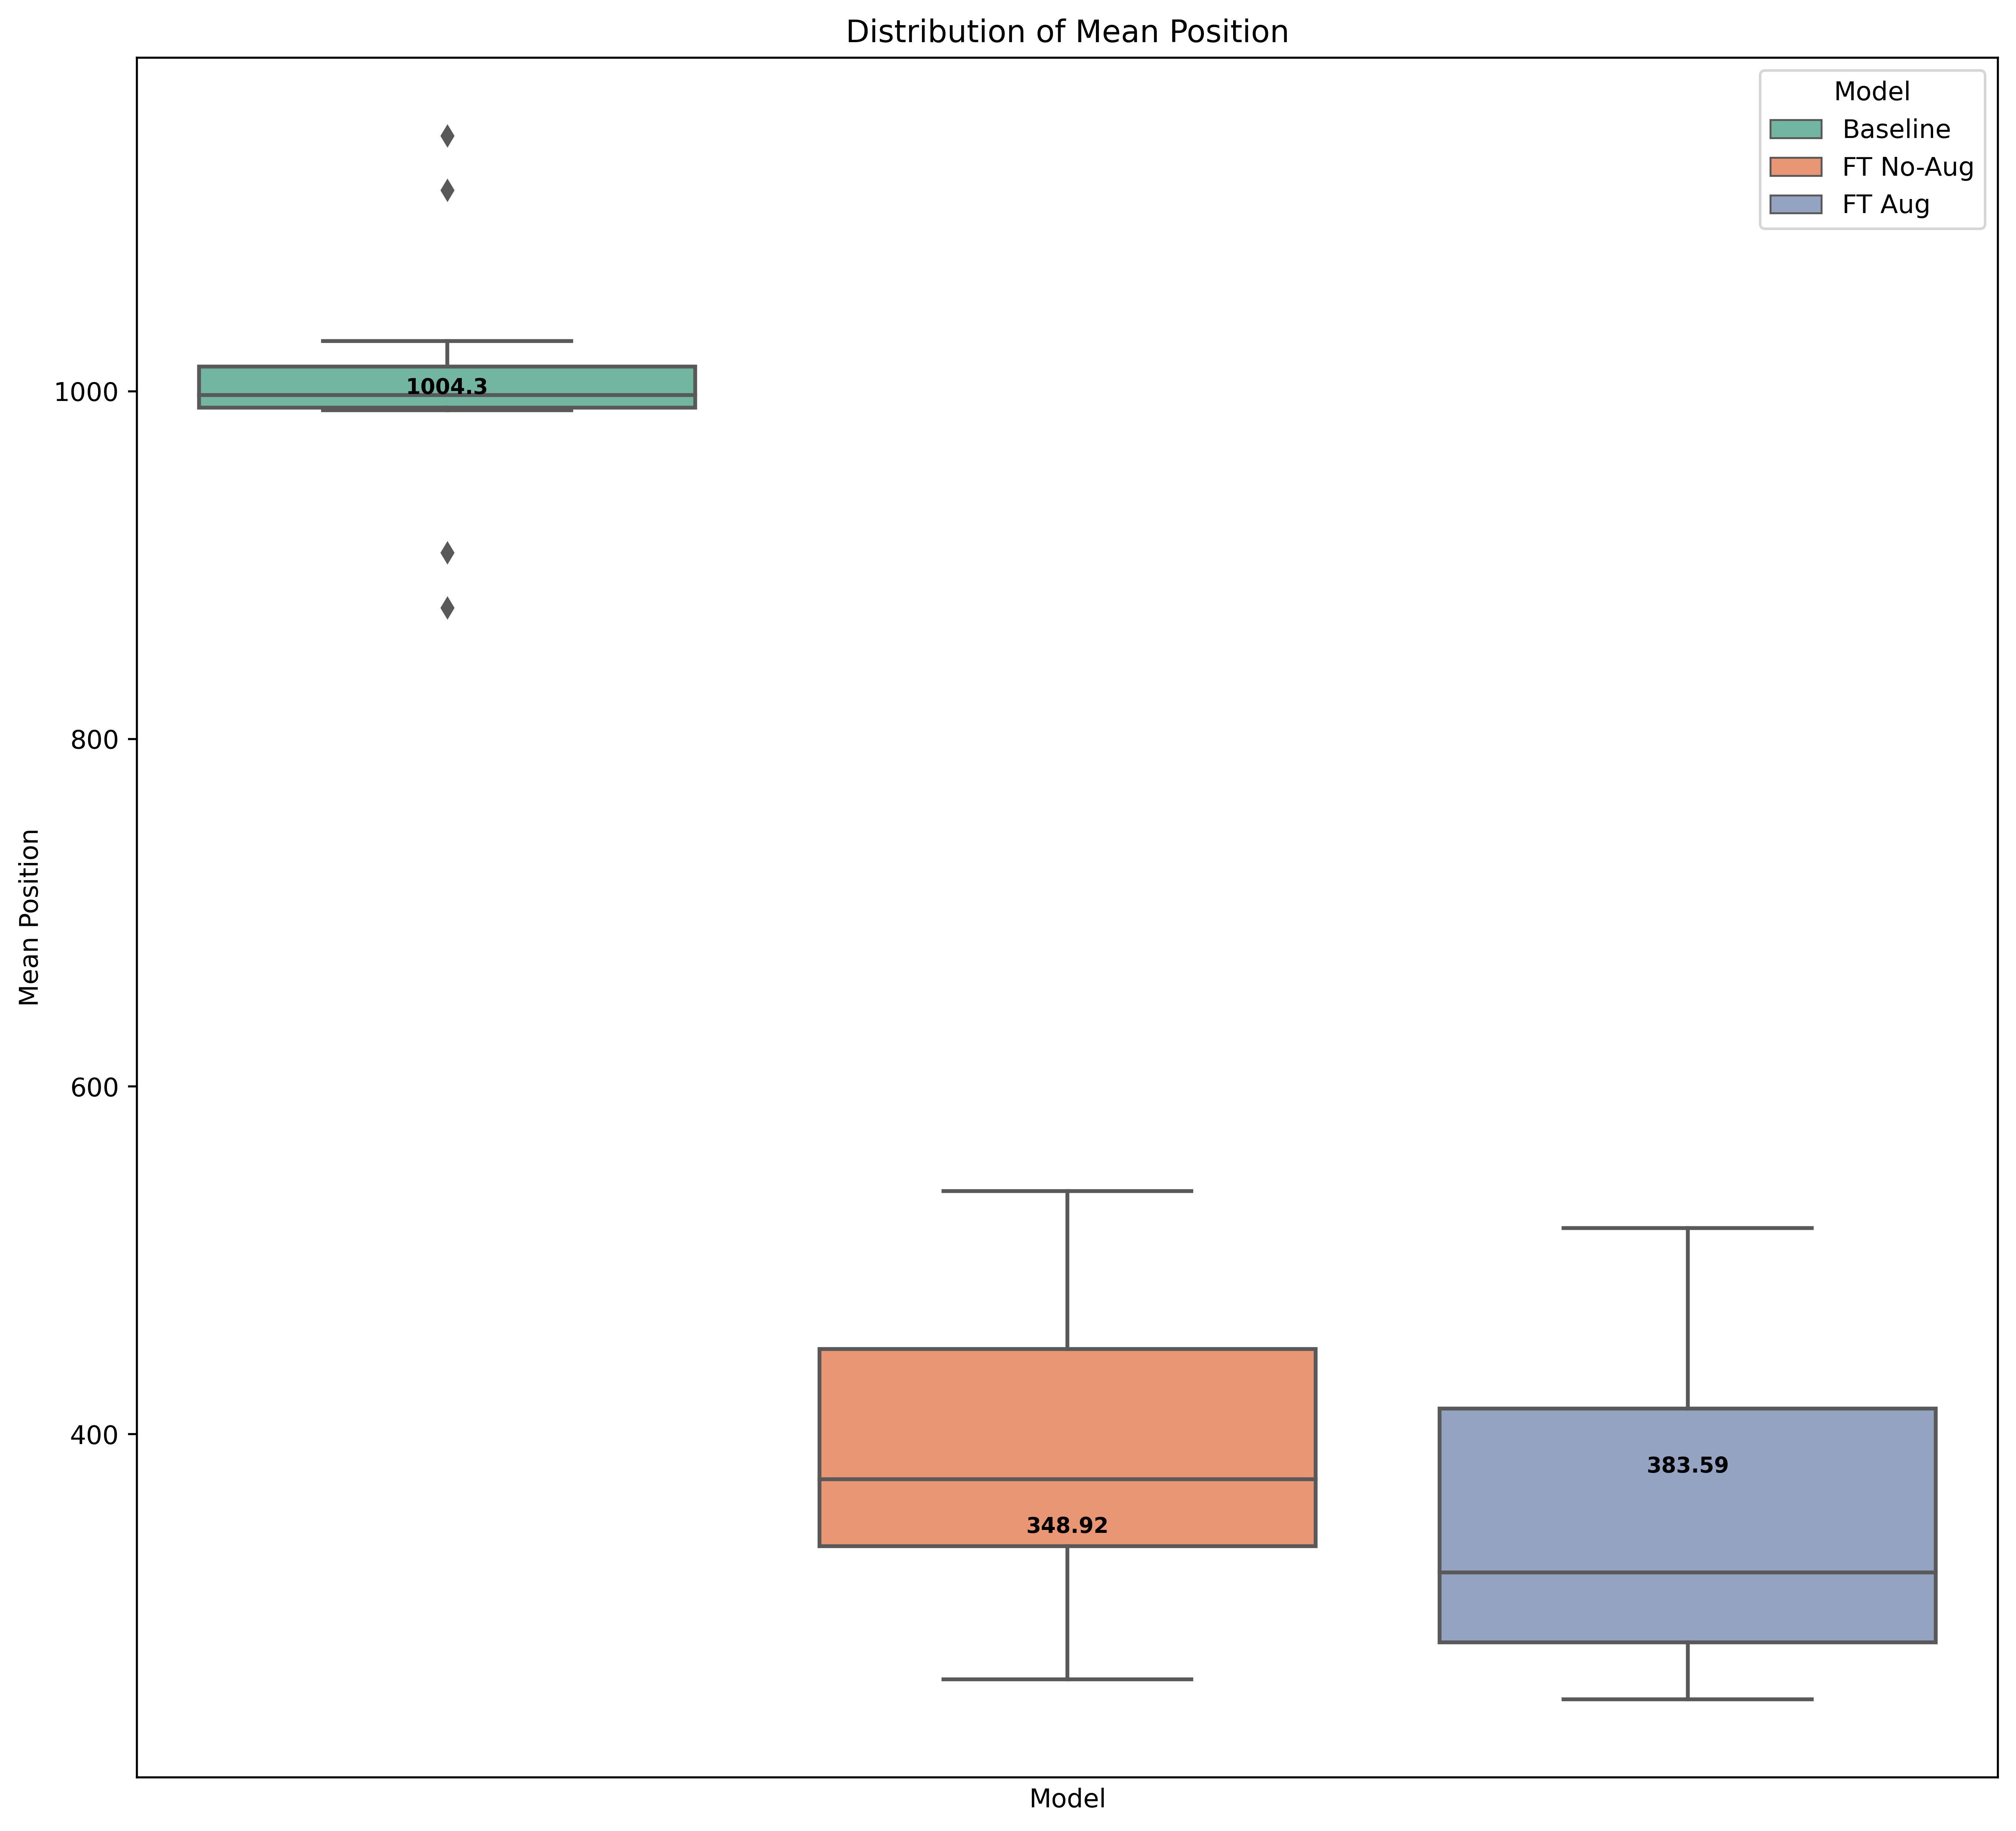

In [21]:
plts = plt.figure(figsize=(11, 10), dpi=500)
ax = sns.boxplot(x="model", y="MP", data=val_ft_baseline, palette="Set2", hue="model", dodge=False, showmeans=False)

means = val_ft_baseline.groupby(['model'])['MP'].mean()
vertical_offset = val_ft_baseline['MP'].mean() * - 0.01 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick, means[xtick] + vertical_offset, np.round(means[xtick], 2), 
            horizontalalignment='center',size='small',color='black',weight='semibold')

ax.set_title("Distribution of Mean Position")
ax.set_xticks([])
ax.set_ylabel("Mean Position")
ax.set_xlabel("Model")
ax.legend(title="Model")
plts.tight_layout()

In [5]:
non_train_metrics_mini_replica = non_train_metrics_pt_replica[non_train_metrics_pt_replica["model"]=="Mini-Replica"]
non_train_metrics_clus_replica = non_train_metrics_pt_replica[non_train_metrics_pt_replica["model"]=="Clus-Replica"]

val_replica = pd.concat([non_train_metrics_pt, non_train_metrics_mini_replica, non_train_metrics_mini_replica_ft_noaug, non_train_metrics_mini_replica_ft_aug, non_train_metrics_clus_replica, non_train_metrics_clus_replica_ft_noaug, non_train_metrics_clus_replica_ft_aug])

Text(0, 1004.2984119950714, '1004.3')

Text(1, 555.1012408797659, '555.1')

Text(2, 440.7433574661245, '440.74')

Text(3, 368.20679403259004, '368.21')

Text(4, 460.88345905918146, '460.88')

Text(5, 394.09035984767723, '394.09')

Text(6, 491.15505995883814, '491.16')

Text(0.5, 1.0, 'Distribution of Mean Position')

[]

Text(0, 0.5, 'Mean Position')

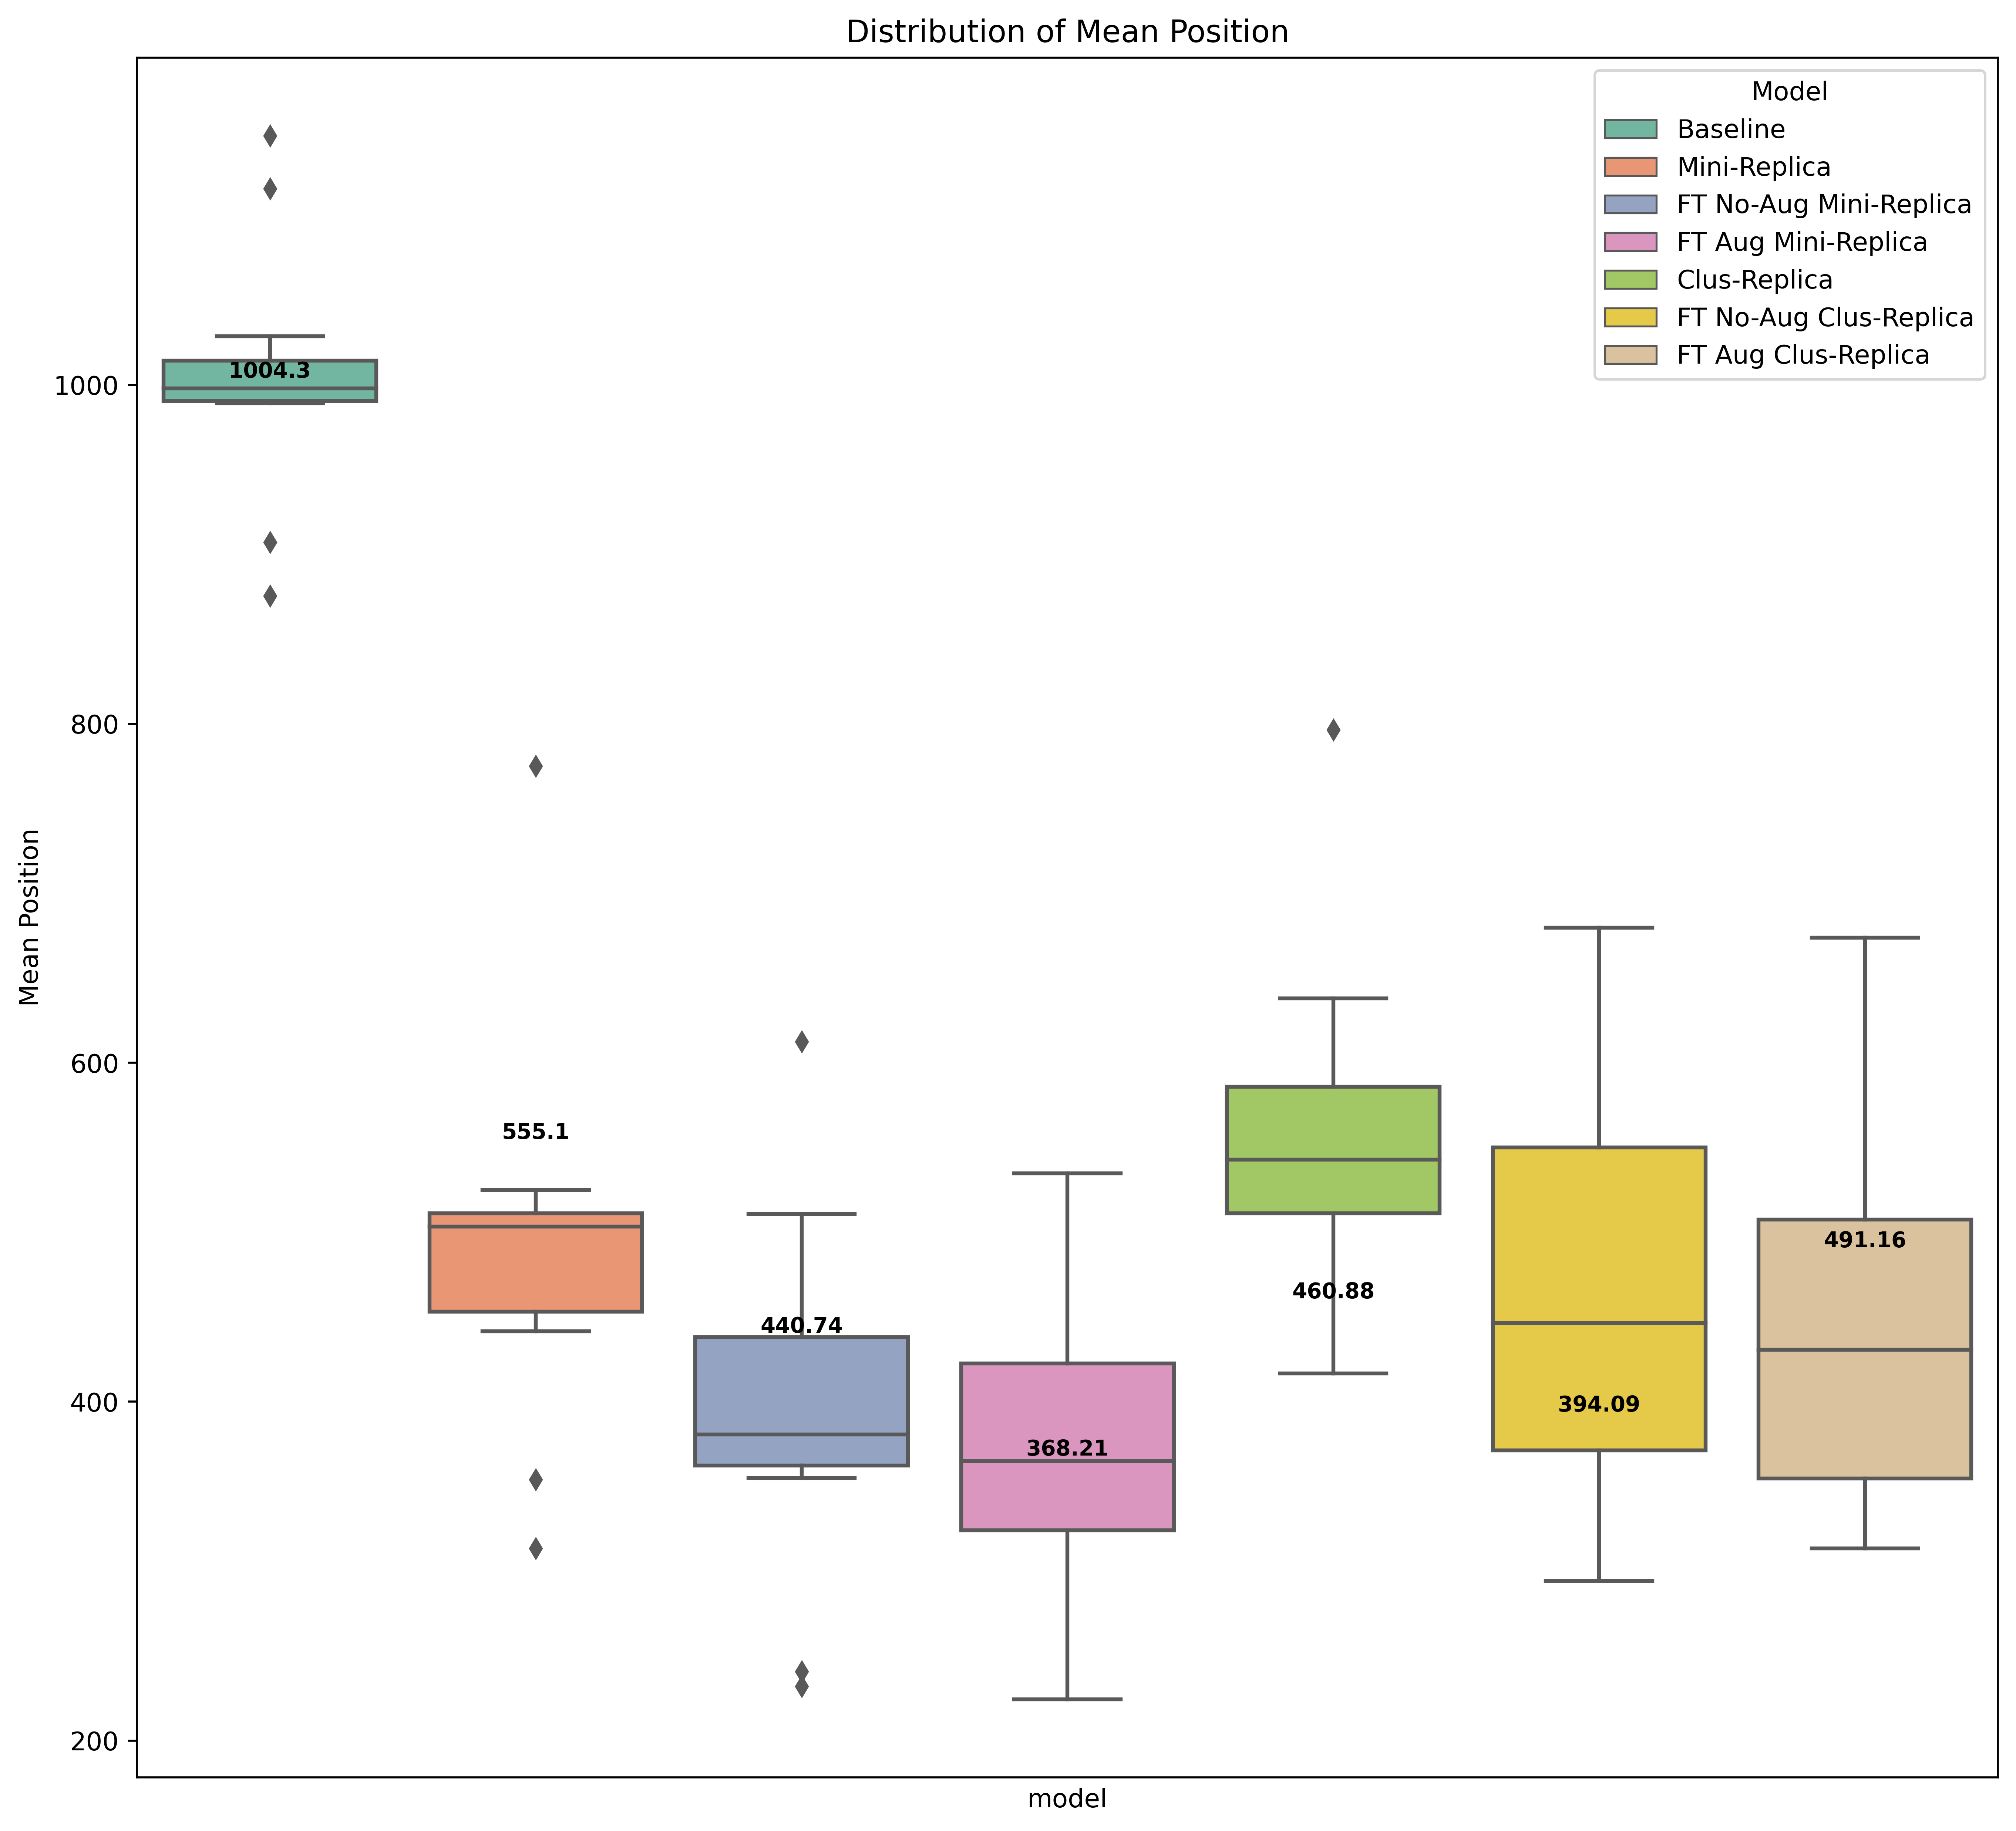

In [20]:
plts = plt.figure(figsize=(11, 10), dpi=500)
ax = sns.boxplot(x="model", y="MP", data=val_replica, palette="Set2", hue="model", dodge=False, showmeans=False)

means = val_replica.groupby(['model'])['MP'].mean()
vertical_offset = val_replica['MP'].mean() * 0 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick, means[xtick] + vertical_offset, np.round(means[xtick], 2), 
            horizontalalignment='center',size='small',color='black',weight='semibold')
    
ax.set_title("Distribution of Mean Position")
ax.set_xticks([])
ax.set_ylabel("Mean Position")
ax.legend(title="Model")
plts.tight_layout()